In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

In [2]:
#Specify date range for analysis:

#end = dt.datetime.now()
#start = dt.datetime(2020,11,8)
#start, end



In [3]:
#Select the stocks/tickers you would like to analyse:

#stockList = ['2120', '8020', '4280','8190']
#stocks = [i + '.SR' for i in stockList]
#stocks

In [4]:
#call the Pandas_Datareader DataReader module:
import pandas_datareader as web
stocks = ["2222.SR", "2380.SR", "2030.SR", "4030.SR"]
multpl_stocks = web.get_data_yahoo(stocks,start = "2020-11-08",end = "2021-11-07")
multpl_stocks.head()
#df = pdr.get_data_yahoo(stocks, start, end)
#df.head()

Attributes  Adj Close                                    Close          \
Symbols       2222.SR 2380.SR    2030.SR    4030.SR    2222.SR 2380.SR   
Date                                                                     
2020-11-08  33.179535   12.90  84.958618  38.096622  34.849998   12.90   
2020-11-09  33.798382   13.40  93.424599  38.428722  35.500000   13.40   
2020-11-10  33.992432   13.62  91.631805  38.523605  35.349998   13.62   
2020-11-11  34.136673   13.82  93.524200  38.571053  35.500000   13.82   
2020-11-12  33.896278   13.78  95.217392  38.238949  35.250000   13.78   

Attributes                             High          ...        Low  \
Symbols       2030.SR    4030.SR    2222.SR 2380.SR  ...    2030.SR   
Date                                                 ...              
2020-11-08  85.300003  40.150002  34.849998   12.96  ...  80.000000   
2020-11-09  93.800003  40.500000  35.500000   13.42  ...  86.000000   
2020-11-10  92.000000  40.599998  35.599998   13.96  ...  85.000000   
2020-11-11  93.900002  40.650002  35.500000   13.94  ...  89.099998   
2020-11-12  95.599998  40.299999  35.450001   13.88  ...  92.099998   

Attributes                  Open                                   Volume  \
Symbols       4030.SR    2222.SR 2380.SR    2030.SR    4030.SR    2222.SR   
Date                                                                        
2020-11-08  40.000000  34.450001   12.68  80.300003  40.000000  2848749.0   
2020-11-09  40.200001  34.900002   13.02  88.099998  40.299999  6694609.0   
2020-11-10  40.200001  35.500000   13.80  97.000000  40.799999  8991909.0   
2020-11-11  40.299999  35.349998   13.74  94.000000  40.500000  4222336.0   
2020-11-12  40.150002  35.400002   13.84  94.099998  40.650002  2661404.0   

Attributes                                   
Symbols       2380.SR    2030.SR    4030.SR  
Date                                         
2020-11-08  1792621.0  6125032.0   963988.0  
2020-11-09  3331713.0  5838230.0  1372011.0  
2020-11-10  5425827.0  8595465.0  3338804.0  
2020-11-11  3609398.0  5582718.0  2204371.0  
2020-11-12  1664115.0  5756276.0  1154513.0  

[5 rows x 24 columns]

In [5]:
returnV = multpl_stocks['Adj Close']
returnV.head()

Symbols,2222.SR,2380.SR,2030.SR,4030.SR
Date,,,,
2020-11-08,33.179535,12.90,84.958618,38.096622
2020-11-09,33.798382,13.40,93.424599,38.428722
2020-11-10,33.992432,13.62,91.631805,38.523605
2020-11-11,34.136673,13.82,93.524200,38.571053
2020-11-12,33.896278,13.78,95.217392,38.238949


In [6]:
returnV = multpl_stocks['Adj Close'].pct_change()

In [7]:
returnV.head()

Symbols,2222.SR,2380.SR,2030.SR,4030.SR
Date,,,,
2020-11-08,NaN,NaN,NaN,NaN
2020-11-09,0.018651,0.038760,0.099648,0.008717
2020-11-10,0.005741,0.016418,-0.019190,0.002469
2020-11-11,0.004243,0.014684,0.020652,0.001232
2020-11-12,-0.007042,-0.002894,0.018104,-0.008610


In [8]:
returnV=returnV.dropna()
returnV.head()

Symbols,2222.SR,2380.SR,2030.SR,4030.SR
Date,,,,
2020-11-09,0.018651,0.038760,0.099648,0.008717
2020-11-10,0.005741,0.016418,-0.019190,0.002469
2020-11-11,0.004243,0.014684,0.020652,0.001232
2020-11-12,-0.007042,-0.002894,0.018104,-0.008610
2020-11-15,0.001418,0.002903,0.004184,0.012407


In [9]:
matrix_of_return_values = returnV.to_numpy()
matrix_of_return_values = np.asmatrix(matrix_of_return_values)
matrix_of_return_values=matrix_of_return_values.T

In [10]:
collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

In [11]:
no_of_asset_classes=4
def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights /=sum(random_asset_weights)
    random_asset_weights=np.asmatrix(random_asset_weights)
    return random_asset_weights 

In [12]:
def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances =np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean =asset_weights*asset_means #t
    portfolio_mean=portfolio_mean.item()
    portfolio_standard_deviation = np.sqrt(asset_weights*asset_covariances*asset_weights.T) #t
    portfolio_standard_deviation=portfolio_standard_deviation.item()
    portfolio_sharpe_ratio =portfolio_mean / portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio

In [13]:
no_of_portfolios=2000
while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    portfolio_means.append(get_portfolio_statistics(random_asset_weights,matrix_of_return_values)[0])
    portfolio_standard_deviations.append( get_portfolio_statistics(random_asset_weights,matrix_of_return_values)[1])
    portfolio_sharpe_ratios.append( get_portfolio_statistics(random_asset_weights,matrix_of_return_values)[2])

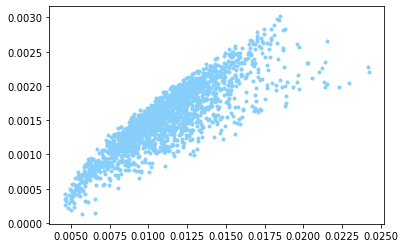

In [14]:
plt.plot(portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'lightskyblue') 
plt.show()

In [15]:
index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))

In [16]:
print(collection_of_random_asset_weights[index])
print(portfolio_sharpe_ratios[index])

[[0.54223706 0.29767757 0.13510445 0.02498093]]
0.17490822888807847


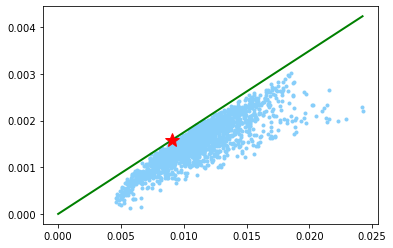

In [17]:
x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot( portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.plot(portfolio_standard_deviations[index],portfolio_means[index],color="red",marker="*",markersize = 15)
plt.show()